# Data visualization on Ford GoBike Data
## by Avijit Kumar Ghosh

## Preliminary Wrangling

#### Introduction

Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States), in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company.After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. (Source : Wikipedia)

I have taken a datasets of Ford GoBike datasets which renders information about different aspects for the year of 2017.

#### Data Loading

In [140]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [141]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [142]:
#checking columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [143]:
#data description
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [144]:
# fetching sample data
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
193985,665,2017-10-28 10:07:40.4900,2017-10-28 10:18:45.5970,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,-122.403234,3002,Subscriber,1956.0,Male
373727,917,2017-09-06 18:28:43.8050,2017-09-06 18:44:00.8050,37,2nd St at Folsom St,37.785000,-122.395936,76,McCoppin St at Valencia St,37.771662,-122.422423,2037,Subscriber,1990.0,Female
342147,857,2017-09-16 09:03:14.8650,2017-09-16 09:17:32.5630,107,17th St at Dolores St,37.763015,-122.426497,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,334,Subscriber,1989.0,Male
462296,1365,2017-08-05 13:38:49.2710,2017-08-05 14:01:34.6830,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,234,Customer,NaN,NaN
492119,1061,2017-07-21 12:46:49.2290,2017-07-21 13:04:30.2410,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,1932,Subscriber,1963.0,Male


>Columns 'start_time' and 'end_time' are in object format which must be converted to datetime for convenience

In [145]:
#converting start_time and end_time to datetime datatype
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [146]:
#again checking column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 59.5+ MB


> There exists null values in the columns 'member_birth_year' and 'member_gender', these need to be omitted.

In [147]:
#Removing null values from member_gender
df=df[df.member_gender.isnull()==False]


In [148]:
#Removing null values from member_birth year
df=df[df.member_birth_year.isnull()==False]

In [149]:
#Resetting index
df.reset_index(drop=True,inplace=True)

In [150]:
#Describe start time
df['start_time'].describe()

count                         453159
unique                        453149
top       2017-10-06 13:22:43.024000
freq                               2
first     2017-06-28 09:47:36.347000
last      2017-12-31 23:59:01.261000
Name: start_time, dtype: object

In [151]:
#creating new column start_time_month by extracting month from start_time
df['start_time_month']=df['start_time'].map(lambda x: x.strftime('%B'))

In [152]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453159 entries, 0 to 453158
Data columns (total 16 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
start_time_month           453159 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage:

In [153]:
#Creating new column member age from member birth year (calculated from 2019)
df['member_age']=2019-df.member_birth_year

In [154]:
#changing member age to integer
df['member_age']=df['member_age'].astype(int)

In [155]:
#changing member birth year to integer
df['member_birth_year']=df['member_birth_year'].astype(int)

In [156]:
# checking distribution of members age
df['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    453159.000000
mean         38.595213
std          10.513488
min          20.000000
10%          27.000000
20%          30.000000
30%          32.000000
40%          34.000000
50%          36.000000
60%          39.000000
70%          42.000000
75%          45.000000
80%          47.000000
90%          54.000000
95%          58.000000
max         133.000000
Name: member_age, dtype: float64

> 95% of the members age fall under 58 with an average of 38 whereas the maximum age is being reflected as 133 which is an outlier.The system may better if the whole set of members age can be filtered within 58.

In [157]:
#Removing ages more than 58
df=df[df['member_age']<=58]

In [158]:
#Resetting index
df.reset_index(drop=True,inplace=True)

In [159]:
#Creating age groups
df['member_age_group']=df['member_age'].apply(lambda x:'20-30' if 20<=x<30
                                              else '30-40' if 30<=x<40
                                              else '40-50' if 40<=x<50
                                              else '50-60' if 50<=x<60
                                              else x)

In [160]:
#Create new column start time weekday by extracting days from start time
df['start_time_weekday'] = df['start_time'].dt.strftime('%a')


In [161]:
# Creating new columns start time hour and end time hour by changing start time and end time to hours
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [162]:
#creating of new columns duration in minutes and hours
df['duration_min']=df['duration_sec']/60
df['duration_hour']=df['duration_min']/60

In [163]:
# function to create categorical datatype
def BuildCategoricalType(col_name):
    level_order=list(df[col_name].value_counts().index)
    ordered_cat=pd.api.types.CategoricalDtype(ordered=True,categories=level_order)
    df[col_name]=df[col_name].astype(ordered_cat)

In [164]:
# converting member_age_group to categorical
BuildCategoricalType('member_age_group')

In [165]:
# converting user_type to categorical
BuildCategoricalType('user_type')

In [166]:
# converting member_gender to categorical
BuildCategoricalType('member_gender')

In [167]:
#checking to see if the above function actually worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431332 entries, 0 to 431331
Data columns (total 23 columns):
duration_sec               431332 non-null int64
start_time                 431332 non-null datetime64[ns]
end_time                   431332 non-null datetime64[ns]
start_station_id           431332 non-null int64
start_station_name         431332 non-null object
start_station_latitude     431332 non-null float64
start_station_longitude    431332 non-null float64
end_station_id             431332 non-null int64
end_station_name           431332 non-null object
end_station_latitude       431332 non-null float64
end_station_longitude      431332 non-null float64
bike_id                    431332 non-null int64
user_type                  431332 non-null category
member_birth_year          431332 non-null int32
member_gender              431332 non-null category
start_time_month           431332 non-null object
member_age                 431332 non-null int32
member_age_group     

> Great! It works.

Now it's time to concentrate on the position of start and end stations.It's quite important that only latitude and longitudinal positions have been provided, as a result I need to make it transform to cartesian distances format.I have used __Haversine Formula__ to calculate distances based on geographical latitude and longitude.(Sources: GeeksforGeeks)

#### Distance between start station and end station based on latitude and longitude

In [168]:
# importing math library
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    #radius has been measured as kilometer
    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371 #radius of the Earth
    

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [169]:
# Using the calcuated math on our columns for lat and long
df['distance_km'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [171]:
#Checking distance_km columns
df['distance_km'].describe(percentiles=[.80,.90,.99])

count    431332.000000
mean          1.605005
std           0.983265
min           0.000000
50%           1.413348
80%           2.246559
90%           2.924935
99%           4.691861
max          62.293682
Name: distance_km, dtype: float64

By analysing most of the distance(km) (around 99%) travelled are ranging from 1 km to 4 km (approx) with mean 1.6 km,whereas the max distance travelled is 62 km which is an outlier.Removing the outlier would make the dataset more concrete and relevant for further investigation.


#### Finding max distance travelled by user

In [172]:
max_distance=df.distance_km.max()
df[df.distance_km==max_distance]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,start_time_month,member_age,member_age_group,start_time_weekday,start_time_hour,end_time_hour,duration_min,duration_hour,distance_km
159303,5471,2017-10-31 07:57:18.251,2017-10-31 09:28:29.835,195,Bay Pl at Vernon St,37.812314,-122.260779,312,San Jose Diridon Station,37.329732,...,Male,October,43,40-50,Tue,7,9,91.183333,1.519722,62.293682
315763,5642,2017-09-07 07:07:21.130,2017-09-07 08:41:23.461,195,Bay Pl at Vernon St,37.812314,-122.260779,312,San Jose Diridon Station,37.329732,...,Male,September,43,40-50,Thu,7,8,94.033333,1.567222,62.293682


There exists only two cases where user has travelled the maximum distance,this instances can be eliminated as it won't affect the distributions.


#### Removing the max distance travelled by users

In [173]:
max_distance=df.distance_km.max()
#max_distance
df=df[(df['distance_km']==max_distance)==False]

In [174]:
#resetting index
df.reset_index(drop=True,inplace=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431330 entries, 0 to 431329
Data columns (total 24 columns):
duration_sec               431330 non-null int64
start_time                 431330 non-null datetime64[ns]
end_time                   431330 non-null datetime64[ns]
start_station_id           431330 non-null int64
start_station_name         431330 non-null object
start_station_latitude     431330 non-null float64
start_station_longitude    431330 non-null float64
end_station_id             431330 non-null int64
end_station_name           431330 non-null object
end_station_latitude       431330 non-null float64
end_station_longitude      431330 non-null float64
bike_id                    431330 non-null int64
user_type                  431330 non-null category
member_birth_year          431330 non-null int32
member_gender              431330 non-null category
start_time_month           431330 non-null object
member_age                 431330 non-null int32
member_age_group     

### What is the structure of your dataset?

> After wrangling the necessary data, the final dataset contains 431330 rows and 24 columns

### What is/are the main feature(s) of interest in your dataset?

> Considering all the features from the Ford Bike Share data,duration of bike rides,members age,members gender,consumer type are the main features of my interest.
 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features related to distance between two stations,start time of the bike rides etc will help here to support the mail features

## Univariate Exploration


#### Distribution of members ages with number of bike ride count

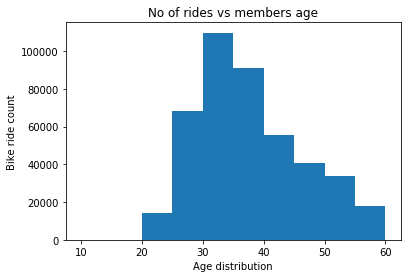

In [214]:
plt.figure(figsize=[6,4])
bin_size=np.arange(10,max(df['member_age'])+5,5)
plt.hist(data=df,x=df['member_age'],bins=bin_size)
plt.xlabel('Age distribution',fontsize=10)
plt.ylabel('Bike ride count',fontsize=10)
plt.title('No of rides vs members age',fontsize=12);

#### Inferences:
1. User's age started with from 20 with the ending cap before 60.
2. Most of the bike rides are carried away by age group between 30 to 35.
3. Distribution is single modal with having skewness on the right.

#### Member age distribution

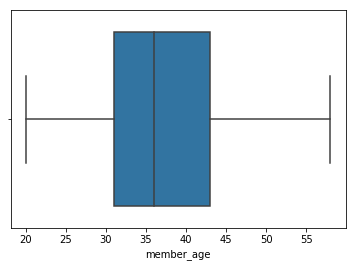

In [56]:
#making boxplot from members age data
sb.boxplot(data=df,x='member_age');

#### Inferences
1. Lowest age is around 20
2. Highest age is around 58
3. 25% of ages are at 30
4. 75% of ages lie within 40 to 45
5. Median of all ages lie within 35 to 36

In [219]:
#Function to find out top 5 most popular stations
def findpopularstation(station_category):
    #extracting top 5 values
    x=df[station_category].value_counts()[0:5].index
    y=df[station_category].value_counts()[0:5]
    #making dictionary
    frame={'City':x,'Count':y}
    df1=pd.DataFrame(frame)
    df1.reset_index(drop=True,inplace=True)
    plt.figure(figsize=[10,4])
    base_color=sb.color_palette()[0]
    plt.title("Top five most popular bike station as per {}".format(station_category),fontsize=15)
    #creating bar plot
    sb.barplot(x="Count",y="City",data=df1,color=base_color);

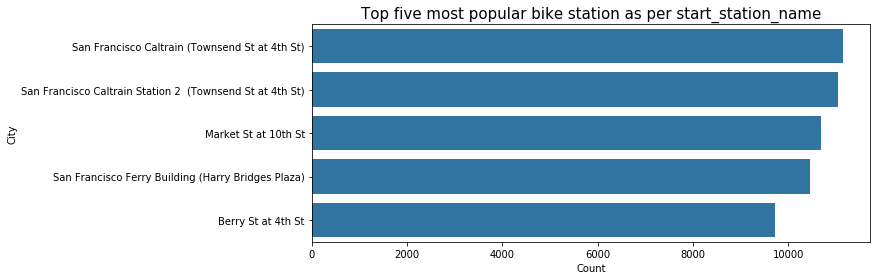

In [220]:
#calling method for the start station name
findpopularstation('start_station_name')

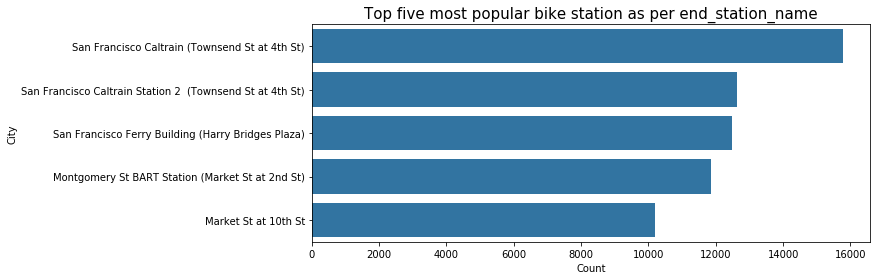

In [221]:
#calling method for the start station name
findpopularstation('end_station_name')

#### Inferences

1. Most popular station is __San Fancisco caltrain (Townsend St at 4th St)__ according to both start station and end station
2. There are 4 stations in common which lies on both the popularity list.



#### User Type count Analysis (to check percentage of subcriber and customer)

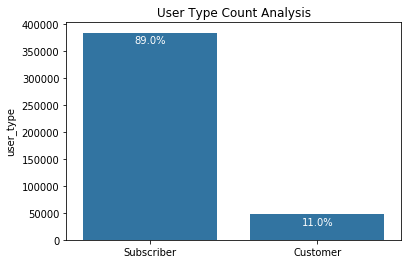

In [60]:
#setting base color for the diagram
base_color=sb.color_palette()[0]
plt.title("User Type Count Analysis")
#storing the value of total users
total_user=df.shape[0]
sb.barplot(x=df['user_type'].value_counts().index,y=df['user_type'].value_counts(),color=base_color);
locs,labels=plt.xticks()

cat_counts=df['user_type'].value_counts()
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total_user)

    # print the annotation just below the top of the bar
    plt.text(loc, count-20000, pct_string, ha = 'center', color = 'w')


#### Inferences

1. It can be observed that people have more inclination towards taking permananet subscription rather single booking.
2. Practically, 89% users come from subscribers whereas 11% are only single customers.

#### Number of users according to age group

In [223]:
df.groupby('member_age_group').size()

member_age_group
30-40    201066
40-50     96120
20-30     82088
50-60     52056
dtype: int64

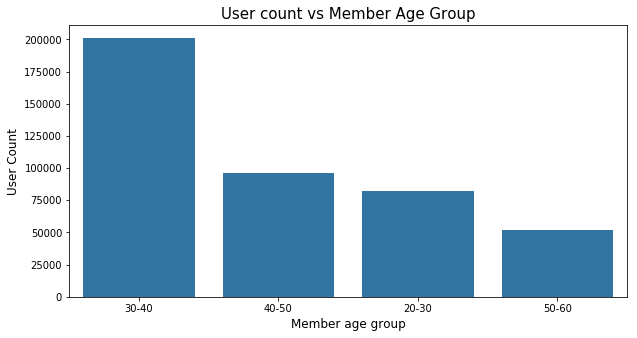

In [240]:
#setting base color
base_color=sb.color_palette()[0]
plt.figure(figsize=[10,5])
order=df.member_age_group.value_counts().index
sb.countplot(data=df,x='member_age_group',color=base_color,order=order)
plt.xlabel('Member age group',fontsize=12)
plt.ylabel('User Count',fontsize=12)
total_user=df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()-12500,str(round((i.get_height()/total_user)*100, 2))+'%', fontsize=15,color='white')
plt.title('User count vs Member Age Group',fontsize=15);

#### Inferences

1. Most users come from within 30-40 age group.
2. People aging between 50-60 have less user count.

#### Bike ride distribution according to month

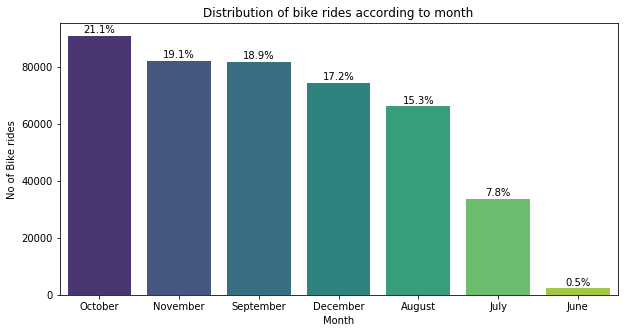

In [130]:
#setting index order
order=df['start_time_month'].value_counts().index
cat_count=df['start_time_month'].value_counts()
#finding total count
tot_count=cat_count.sum()
plt.figure(figsize=[10,5])
base_color=sb.color_palette()[0]
sb.countplot(data=df,x='start_time_month',palette='viridis',order=order)
locs,labels=plt.xticks()
plt.title('Distribution of bike rides according to month')
plt.xlabel('Month')
plt.ylabel('No of Bike rides')
#plot annotation
for loc,label in zip(locs,labels):
    count=cat_count[label.get_text()]
    add_text='{:0.1f}%'.format(count*100/tot_count)
    plt.text(loc,count+1000,add_text,ha='center')

#### Inferences

1. Users mostly ride on October followed by November.
2. There exists less difference between number of people who opt for November than September.
3. In June, people have the least count of bike rides.

#### Finding High Demand of Bike ride hours in a day

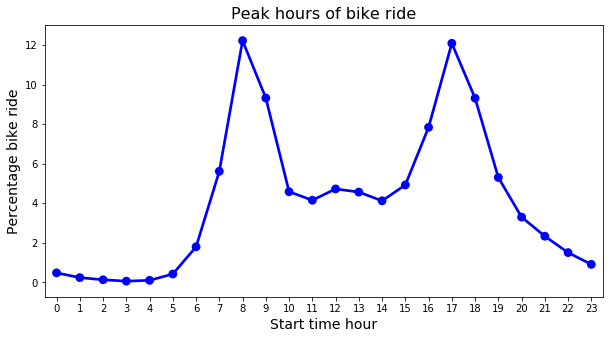

In [193]:
plt.figure(figsize=(10,5))
#extracting values in a sample dataframe
df1=df.groupby(['start_time_hour'],as_index=False)['bike_id'].count()
df1['percentg_count']=(np.array(df1.bike_id)/df.shape[0])*100
#setting point plot
sb.pointplot(data=df1,x='start_time_hour',y='percentg_count',color='blue')
plt.xlabel("Start time hour",fontsize=14)
plt.ylabel("Percentage bike ride",fontsize=14)
plt.title("Peak hours of bike ride",fontsize=16);

#### Inferences

1. There exists two peak points where ride demand was high.
2. Most ride took place at 8 am at morning and again 6 pm in evening.
3. There is a snip dip of ride demand between 11 am to 15 am and again it shoot up.

## Bivariate Exploration



#### Distribution of Distance covered with respect to age group and gender group

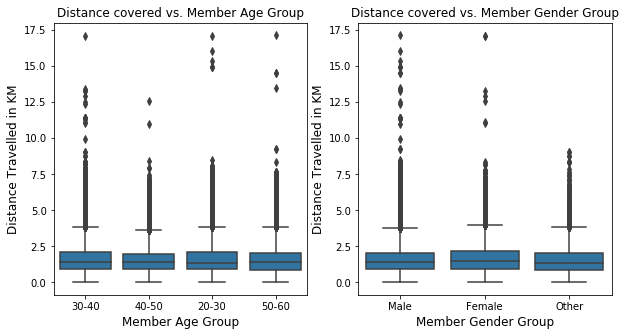

In [241]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: Box plot
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data = df, x = 'member_age_group', y = 'distance_km', color = base_color)
plt.xlabel('Member Age Group',fontsize=12)
plt.ylabel('Distance Travelled in KM',fontsize=12)
plt.title('Distance covered vs. Member Age Group')
plt.ylim()

# right plot: box plot
plt.subplot(1, 2, 2)
ax2=sb.boxplot(data = df, x = 'member_gender', y = 'distance_km', color = base_color)
plt.xlabel('Member Gender Group',fontsize=12)
plt.ylabel('Distance Travelled in KM',fontsize=12)
plt.title('Distance covered vs. Member Gender Group');


#### Inferences

1. People aging between 20 to 30 and 30 to 40 usually crossed much distance
2. Male members travelled much distance


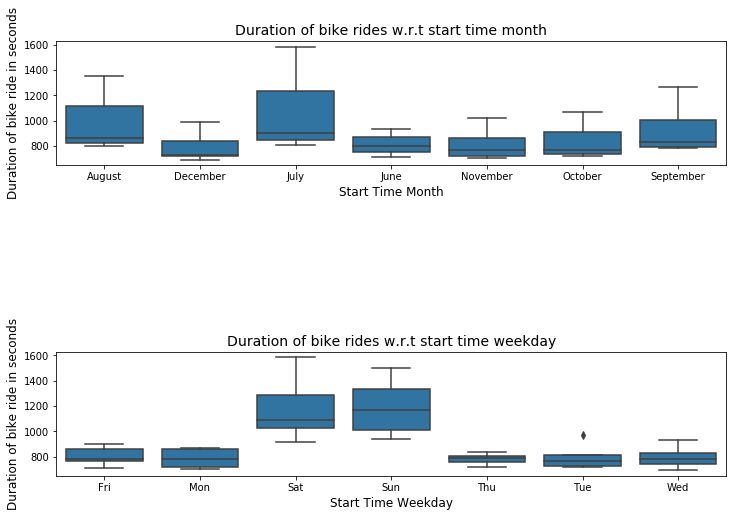

In [252]:
plt.figure(figsize=[12,8])
#fig, axes = plt.subplots(nrows=4, ncols=1)
base_color=sb.color_palette()[0]
plt.subplot(2,1,1)
df1=df.groupby(['start_time_month','start_time_weekday'],as_index=False)['duration_sec'].mean()
sb.boxplot(data=df1,x='start_time_month',y='duration_sec',color=base_color)
plt.xlabel('Start Time Month',fontsize=12)
plt.ylabel('Duration of bike ride in seconds',fontsize=12)
plt.title('Duration of bike rides w.r.t start time month',fontsize=14)

plt.subplots_adjust(wspace=1.5, hspace=1.5)
plt.subplot(2,1,2)
df1=df.groupby(['start_time_month','start_time_weekday'],as_index=False)['duration_sec'].mean()
sb.boxplot(data=df1,x='start_time_weekday',y='duration_sec',color=base_color)
plt.xlabel('Start Time Weekday',fontsize=12)
plt.ylabel('Duration of bike ride in seconds',fontsize=12)
plt.title('Duration of bike rides w.r.t start time weekday',fontsize=14);

#### Inferences

1. In month August had the high demand of bike rides.
2. People mostly opt for the rides during Saturday and Sundays.



#### Bivariate analysis of customer usage during weekdays

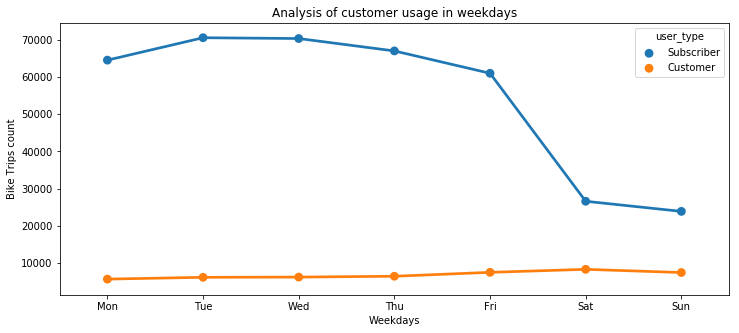

In [253]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_weekday = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_weekday, x='start_time_weekday', y=0, hue = 'user_type', order = weekday);

plt.title('Analysis of customer usage in weekdays',  fontsize=12)
plt.xlabel('Weekdays')
plt.ylabel('Bike Trips count');

#### Inferences

1. People have more inclination towards taking subscription ride rather than single ride.
2. Subscribed customers have high trend during weekdays and fall down during weekends(Sat and Sun).
3. There is sharp increase in usage statistics for normal customer during weekends.

#### Member Gender Analysis for subcriber and customer

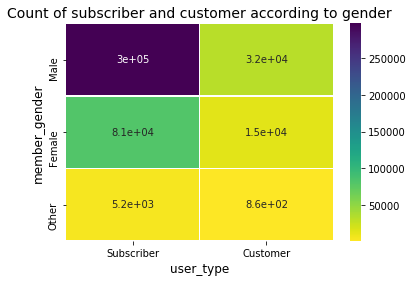

In [262]:
#Extracting values by group by user types and genders
ct_counts = df.groupby(['user_type', 'member_gender']).size()
ct_counts = ct_counts.reset_index(name = 'count')
#setting pivots
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
plt.xlabel('User Type',fontsize=12)
plt.ylabel('Member Gender',fontsize=12)
plt.title('Count of subscriber and customer according to gender',fontsize=14)
sb.heatmap(ct_counts,annot=True,cmap = 'viridis_r',linewidths=.5);

#### Inferences

1. People mostly belonging from subscriber and male community.
2. Least users are from customer who belong to other community.
3. The other community members have low counts of usage.

## Multivariate Exploration

#### Distance covered relationship with member age group and member gender

In [264]:
#extract data based on member age group and gender
df.groupby(['member_age_group','member_gender'],as_index=False)['distance_km'].mean()

,member_age_group,member_gender,distance_km
0,30-40,Male,1.613986
1,30-40,Female,1.683353
2,30-40,Other,1.877690
3,40-50,Male,1.580306
4,40-50,Female,1.571371
5,40-50,Other,1.566548
6,20-30,Male,1.570973
7,20-30,Female,1.696353
8,20-30,Other,1.289958
9,50-60,Male,1.515096


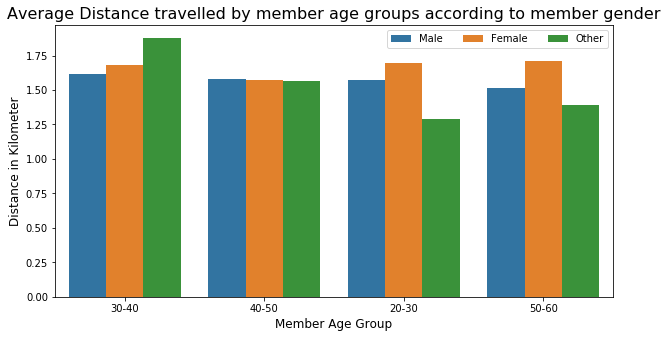

In [267]:
plt.figure(figsize=(10,5))
df1=df.groupby(['member_age_group','member_gender'],as_index=False)['distance_km'].mean()
ax=sb.barplot(data=df1,x='member_age_group',y='distance_km',hue='member_gender')
ax.legend(loc=1,ncol=3)
plt.title('Average Distance travelled by member age groups according to member gender',fontsize=16)
plt.xlabel('Member Age Group',fontsize=12)
#for p in ax.patches:
    #ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.ylabel('Distance in Kilometer',fontsize=12);

#### Inferences

1. Contrary to what we have seen previous visualization,here male community from all ages travelled almost a fixed average distance.
2. On an average people across all genders and ages have covered 1 km distances frequently.
3. People from other community covered maximum distance in average in the age group of 30 to 40.

#### Creating Plot Matrix

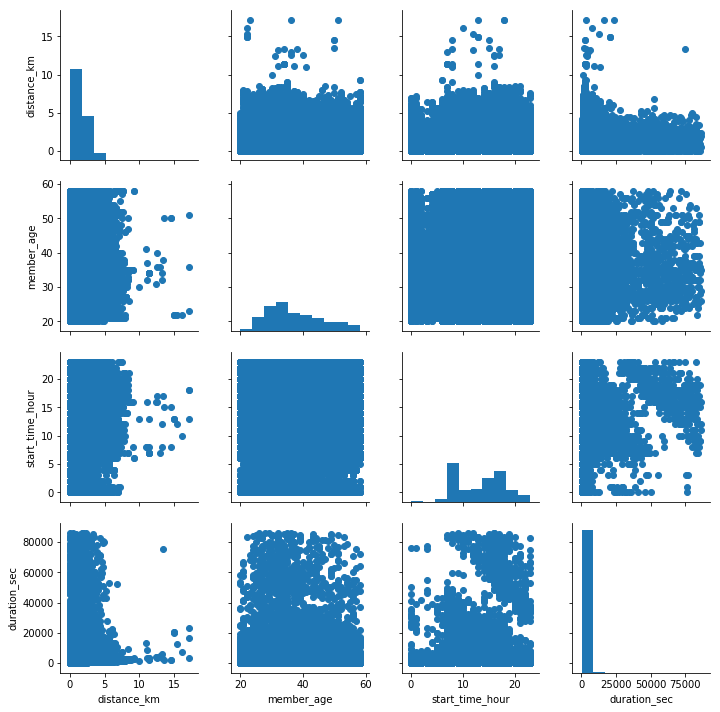

In [281]:
#extracting numerical variables
#plt.title('Multivariate analysis of distance,age,start time hour and duration',fontsize=14)
num_variables=['distance_km', 'member_age', 'start_time_hour','duration_sec']
g = sb.PairGrid(data = df, vars = num_variables)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

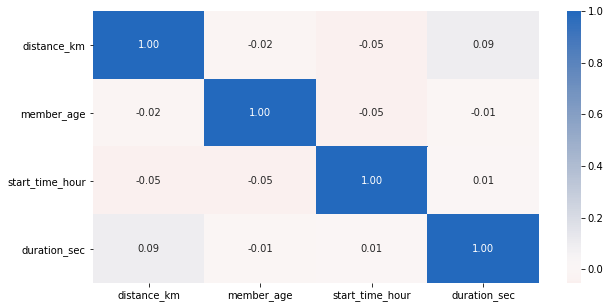

In [280]:
#creating heatmap among numerical variables
num_variables=['distance_km', 'member_age', 'start_time_hour','duration_sec']
plt.figure(figsize=[10,5])
sb.heatmap(df[num_variables].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here I have rendered among different numerical variables which explains the relationships among users distance travelled,their journey start time,age details and durationof travel.While investigating it can be seen that distance and duration have positive co relation with less co relational co efficient value which is quite true since the more distance travelled by user would take up more time on it.Also people aging between 20-30 have less incilination towards taking bike ride rather than people of much older than them
### Were there any interesting or surprising interactions between features?

> The investigation shows much reward as it throws some interesting feature among 'other' gender community.They have now come up with taking bike rides across all the ages covering much average distances.